In [ ]:
import numpy as np
from SynthTempNetwork import Individual, SynthTempNetwork
from TemporalNetwork import ContTempNetwork, StaticTempNetwork
from FlowStability import SparseClustering, FlowIntegralClustering, run_multi_louvain, avg_norm_var_information
import parallel_clustering
import pickle

import matplotlib.pyplot as plt
import matplotlib
from matplotlib.gridspec import GridSpec
import matplotx

from scipy.sparse import (lil_matrix, dok_matrix, diags, eye, isspmatrix_csr, isspmatrix,
                          csr_matrix, coo_matrix, csc_matrix)
from scipy.sparse.linalg import eigsh

from SparseStochMat import sparse_autocov_mat
import auxiliary_functions

from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import matplotlib.image as mpimg
import agents_SBM_generate

Could not load sparse_dot_mkl. Will use scipy.sparse for matrix products.


In [ ]:
#net_heat0 = ContTempNetwork.load('evolving_SBM_net0')

# Example usage:
t_start = 0
delta1 = 150
t_end = 2 * delta1

num_cores = 4

block_mod_func = agents_SBM_generate.make_step_block_probs(delta1,  num_cores=num_cores, basis_num_communities = 2, powers_num_communities = [2, 1], list_p_within_community=[49/50] * 2)
net_heat0 = agents_SBM_generate.generate_evolving_SBM(block_mod_func=block_mod_func, inter_tau= 100, activ_tau= 5, n_per_group=10, n_groups = num_cores, t_start= t_start, t_end=t_end)

running simulation
PID  1006377  :  merged  489  events
PID  1006377  :  merged  0  events


In [4]:
#net_heat0 = ContTempNetwork.load('evolving_SBM_net3_b')

In [5]:
net_heat0.compute_laplacian_matrices(save_adjacencies=True)

In [6]:
number_active_events = []
for i,t in enumerate(net_heat0.times[:-1]):
    number_active_events.append(np.sum(net_heat0.adjacencies[i].toarray()) / 2)

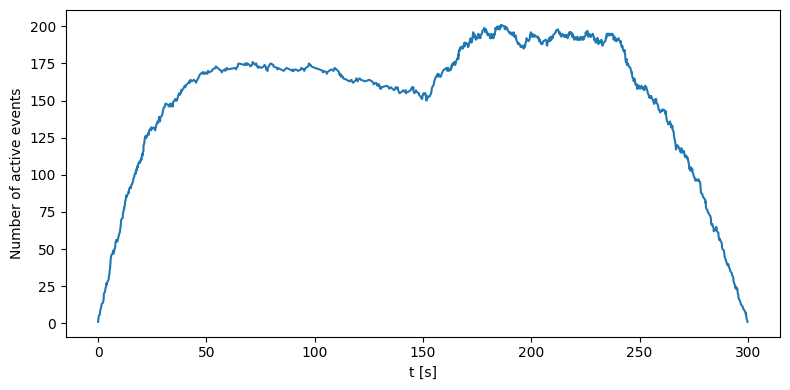

In [7]:
fig, ax = plt.subplots(1,1, figsize = (8, 4))

ax.plot(net_heat0.times[:-1], number_active_events)
ax.set_xlabel("t [s]")
ax.set_ylabel("Number of active events")

plt.tight_layout()  # otherwise the right y-label is slightly clipped
#plt.savefig('/home/b/skoove/Desktop/evolving_SBM/evolving_SBM_activity_function.png', format='png', dpi=300, bbox_inches='tight')

In [15]:
number_active_events_within1 = []
for i,t in enumerate(net_heat0.times[:-1]):
    number_active_events_within1.append(np.sum(net_heat0.adjacencies[i].toarray()[0:10][0:10]) / 2)

In [16]:
net_heat0.adjacencies[i].toarray()[0:5]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.]])

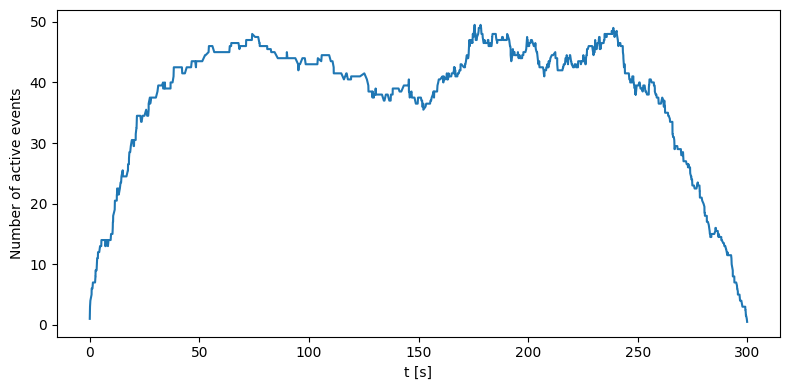

In [17]:
fig, ax = plt.subplots(1,1, figsize = (8, 4))

ax.plot(net_heat0.times[:-1], number_active_events_within1)
ax.set_xlabel("t [s]")
ax.set_ylabel("Number of active events")

plt.tight_layout()  # otherwise the right y-label is slightly clipped
#plt.savefig('/home/b/skoove/Desktop/evolving_SBM/evolving_SBM_activity_function.png', format='png', dpi=300, bbox_inches='tight')

In [20]:
number_active_events_across1 = []
for i,t in enumerate(net_heat0.times[:-1]):
    number_active_events_across1.append(np.sum(net_heat0.adjacencies[i].toarray()[0:10][10:40]) / 2)

In [24]:
net_heat0.adjacencies[100].toarray()[0:10]

array([[0., 0., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 1., 0., 1., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 1., 0., 1., 1., 0., 0., 1., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 1., 1., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
   

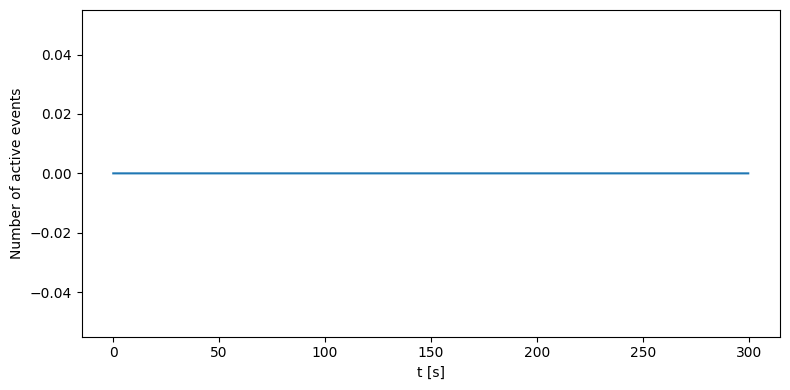

In [21]:
fig, ax = plt.subplots(1,1, figsize = (8, 4))

ax.plot(net_heat0.times[:-1], number_active_events_across1)
ax.set_xlabel("t [s]")
ax.set_ylabel("Number of active events")

plt.tight_layout()  # otherwise the right y-label is slightly clipped
#plt.savefig('/home/b/skoove/Desktop/evolving_SBM/evolving_SBM_activity_function.png', format='png', dpi=300, bbox_inches='tight')